# Analysis of car accidents in Barcelona using Pandas, Matplotlib, and Folium

Dataset source:
https://www.kaggle.com/xvivancos/barcelona-data-sets/downloads/barcelona-data-sets.zip/6

## Exploratory data analysis and data cleaning

https://towardsdatascience.com/analysis-of-car-accidents-in-barcelona-using-pandas-matplotlib-and-folium-73384240106b

In [1]:
import pandas as pd 
import numpy as mp

In [2]:
df = pd.read_csv('accidents_2017.csv')

df.head(10)

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365
5,2017S007775,Sant Martí,el Camp de l'Arpa del Clot,Indústria / Trinxant ...,Wednesday,September,20,12,Morning,1,0,1,2,2.183245,41.416336
6,2017S004484,Sant Martí,el Camp de l'Arpa del Clot,Trinxant / Indústria ...,Saturday,May,20,21,Afternoon,1,0,1,2,2.183245,41.416336
7,2017S010680,Sant Martí,el Camp de l'Arpa del Clot,Indústria ...,Tuesday,December,26,20,Afternoon,2,0,2,1,2.183561,41.416372
8,2017S005152,Sant Martí,el Camp de l'Arpa del Clot,Indústria ...,Monday,June,12,15,Afternoon,1,0,1,1,2.184059,41.416763
9,2017S003932,Sant Martí,el Camp de l'Arpa del Clot,Maragall ...,Wednesday,May,3,20,Afternoon,1,0,1,1,2.181225,41.413958


In [3]:
df.columns

Index(['Id', 'District Name', 'Neighborhood Name', 'Street', 'Weekday',
       'Month', 'Day', 'Hour', 'Part of the day', 'Mild injuries',
       'Serious injuries', 'Victims', 'Vehicles involved', 'Longitude',
       'Latitude'],
      dtype='object')

In [4]:
print(len(df.columns))

list(df.columns)

15


['Id',
 'District Name',
 'Neighborhood Name',
 'Street',
 'Weekday',
 'Month',
 'Day',
 'Hour',
 'Part of the day',
 'Mild injuries',
 'Serious injuries',
 'Victims',
 'Vehicles involved',
 'Longitude',
 'Latitude']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 15 columns):
Id                   10339 non-null object
District Name        10339 non-null object
Neighborhood Name    10339 non-null object
Street               10339 non-null object
Weekday              10339 non-null object
Month                10339 non-null object
Day                  10339 non-null int64
Hour                 10339 non-null int64
Part of the day      10339 non-null object
Mild injuries        10339 non-null int64
Serious injuries     10339 non-null int64
Victims              10339 non-null int64
Vehicles involved    10339 non-null int64
Longitude            10339 non-null float64
Latitude             10339 non-null float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.2+ MB


In [6]:
df.isnull().sum().any()

# meaning there are not null values.

False

In [7]:
df['District Name'].unique()

array(['Unknown', 'Sant Martí', 'Ciutat Vella', 'Eixample',
       'Sants-Montjuïc', 'Les Corts', 'Sarrià-Sant Gervasi', 'Gràcia',
       'Horta-Guinardó', 'Nou Barris', 'Sant Andreu'], dtype=object)

In [8]:
df_trial_1= df.select_dtypes(exclude='number')

df_trial_1.columns

Index(['Id', 'District Name', 'Neighborhood Name', 'Street', 'Weekday',
       'Month', 'Part of the day'],
      dtype='object')

In [9]:
print(df['Id'].unique())

print(df['Id'].isnull().sum())

['2017S008429    ' '2017S007316    ' '2017S010210    ' ...
 '2017S010718    ' '2017S006145    ' '2017S000178    ']
0


In [10]:
df['District Name'].unique()  # Unknown


array(['Unknown', 'Sant Martí', 'Ciutat Vella', 'Eixample',
       'Sants-Montjuïc', 'Les Corts', 'Sarrià-Sant Gervasi', 'Gràcia',
       'Horta-Guinardó', 'Nou Barris', 'Sant Andreu'], dtype=object)

In [11]:
df['Neighborhood Name'].unique()  # Unknown

array(['Unknown', "el Camp de l'Arpa del Clot", 'el Clot',
       'Sant Martí de Provençals', 'la Verneda i la Pau',
       'el Besòs i el Maresme', 'Provençals del Poblenou', 'el Poblenou',
       'Diagonal Mar i el Front Marítim del Poblenou',
       'el Parc i la Llacuna del Poblenou', 'el Raval',
       'la Vila Olímpica del Poblenou', 'el Barri Gòtic',
       'Sant Pere, Santa Caterina i la Ribera', 'la Barceloneta',
       'Sant Antoni', "la Nova Esquerra de l'Eixample",
       'la Sagrada Família', "la Dreta de l'Eixample",
       "l'Antiga Esquerra de l'Eixample", 'el Fort Pienc', 'el Poble-sec',
       'la Marina del Prat Vermell', 'la Marina de Port', 'la Bordeta',
       'Hostafrancs', 'la Font de la Guatlla', 'Sants', 'Sants - Badal',
       'les Corts', 'la Maternitat i Sant Ramon', 'Pedralbes',
       'Sant Gervasi - Galvany', 'Sarrià', 'Sant Gervasi - la Bonanova',
       'les Tres Torres', 'el Putxet i el Farró',
       'Vallvidrera, el Tibidabo i les Planes',
       'V

In [12]:
# 'Street', 'Weekday','Month', 'Part of the day'
df['Street'].unique()

array(['Número 27                                         ',
       'Número 3 Zona Franca / Número 50 Zona Franca      ',
       'Litoral (Besòs)                                   ', ...,
       'PALOMAR / Ferran Junoy                            ',
       "Ciutat d'Asunción / Fra Juníper Serra             ",
       'PL MONTERREY                                      '], dtype=object)

In [13]:
df['Weekday'].unique()

array(['Friday', 'Thursday', 'Wednesday', 'Saturday', 'Tuesday', 'Monday',
       'Sunday'], dtype=object)

In [14]:
df['Month'].unique()

array(['October', 'September', 'December', 'July', 'May', 'June',
       'January', 'April', 'March', 'November', 'February', 'August'],
      dtype=object)

In [15]:
df['Part of the day'].unique()

array(['Morning', 'Afternoon', 'Night'], dtype=object)

In [16]:
import numpy as np
df.replace('Unknown',np.nan, inplace=True)

df

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,NaN,NaN,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,NaN,NaN,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,NaN,NaN,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885
3,2017S006364,NaN,NaN,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10334,2017S003667,Sant Andreu,el Bon Pastor,Litoral (Llobregat) ...,Tuesday,April,25,8,Morning,1,0,1,3,2.201800,41.392004
10335,2017S001896,Sant Andreu,el Bon Pastor,PL MONTERREY ...,Wednesday,March,8,12,Morning,1,0,1,2,2.206013,41.443445
10336,2017S010718,Sant Andreu,el Bon Pastor,Litoral (Llobregat) ...,Thursday,December,28,8,Morning,1,0,1,2,2.205607,41.443894
10337,2017S006145,Sant Andreu,el Bon Pastor,Litoral (Besòs) ...,Friday,July,14,14,Afternoon,1,0,1,2,2.205118,41.444824


In [17]:
df['District Name'].unique() 

array([nan, 'Sant Martí', 'Ciutat Vella', 'Eixample', 'Sants-Montjuïc',
       'Les Corts', 'Sarrià-Sant Gervasi', 'Gràcia', 'Horta-Guinardó',
       'Nou Barris', 'Sant Andreu'], dtype=object)

In [18]:
df['Neighborhood Name'].unique()

array([nan, "el Camp de l'Arpa del Clot", 'el Clot',
       'Sant Martí de Provençals', 'la Verneda i la Pau',
       'el Besòs i el Maresme', 'Provençals del Poblenou', 'el Poblenou',
       'Diagonal Mar i el Front Marítim del Poblenou',
       'el Parc i la Llacuna del Poblenou', 'el Raval',
       'la Vila Olímpica del Poblenou', 'el Barri Gòtic',
       'Sant Pere, Santa Caterina i la Ribera', 'la Barceloneta',
       'Sant Antoni', "la Nova Esquerra de l'Eixample",
       'la Sagrada Família', "la Dreta de l'Eixample",
       "l'Antiga Esquerra de l'Eixample", 'el Fort Pienc', 'el Poble-sec',
       'la Marina del Prat Vermell', 'la Marina de Port', 'la Bordeta',
       'Hostafrancs', 'la Font de la Guatlla', 'Sants', 'Sants - Badal',
       'les Corts', 'la Maternitat i Sant Ramon', 'Pedralbes',
       'Sant Gervasi - Galvany', 'Sarrià', 'Sant Gervasi - la Bonanova',
       'les Tres Torres', 'el Putxet i el Farró',
       'Vallvidrera, el Tibidabo i les Planes',
       'Vallcar

In [19]:
...

Ellipsis

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 15 columns):
Id                   10339 non-null object
District Name        10312 non-null object
Neighborhood Name    10312 non-null object
Street               10339 non-null object
Weekday              10339 non-null object
Month                10339 non-null object
Day                  10339 non-null int64
Hour                 10339 non-null int64
Part of the day      10339 non-null object
Mild injuries        10339 non-null int64
Serious injuries     10339 non-null int64
Victims              10339 non-null int64
Vehicles involved    10339 non-null int64
Longitude            10339 non-null float64
Latitude             10339 non-null float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.2+ MB


In [21]:
df.isnull().sum()

Id                    0
District Name        27
Neighborhood Name    27
Street                0
Weekday               0
Month                 0
Day                   0
Hour                  0
Part of the day       0
Mild injuries         0
Serious injuries      0
Victims               0
Vehicles involved     0
Longitude             0
Latitude              0
dtype: int64

In [22]:
df.info()
# weekday  Month Day Hour

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 15 columns):
Id                   10339 non-null object
District Name        10312 non-null object
Neighborhood Name    10312 non-null object
Street               10339 non-null object
Weekday              10339 non-null object
Month                10339 non-null object
Day                  10339 non-null int64
Hour                 10339 non-null int64
Part of the day      10339 non-null object
Mild injuries        10339 non-null int64
Serious injuries     10339 non-null int64
Victims              10339 non-null int64
Vehicles involved    10339 non-null int64
Longitude            10339 non-null float64
Latitude             10339 non-null float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.2+ MB


In [23]:
df.Month

0          October
1        September
2         December
3             July
4              May
           ...    
10334        April
10335        March
10336     December
10337         July
10338      January
Name: Month, Length: 10339, dtype: object

In [24]:
df.Day.unique()

array([13,  1,  8, 21, 25, 20, 26, 12,  3, 14, 11, 30,  4, 17,  9,  7, 22,
       31, 15,  2, 10, 28, 23, 27, 24, 16,  6,  5, 18, 29, 19],
      dtype=int64)

In [25]:
df.Hour.unique()

array([ 8, 13, 21,  2, 14, 12, 20, 15,  7, 16, 19, 22,  0, 11,  6, 18,  9,
       23, 17, 10,  1,  4,  3,  5], dtype=int64)

In [81]:
data = df.copy()


#df.Weekday= df.Weekday+' '
month_to_int = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}

data.Month= data.Month.replace(month_to_int)

data.Month

0        10
1         9
2        12
3         7
4         5
         ..
10334     4
10335     3
10336    12
10337     7
10338     1
Name: Month, Length: 10339, dtype: int64

In [82]:
data.Temp='2017-'+ (data.Month).map(str)+'-'
data.Day=data.Day.map(str)+' '
data.Hour=data.Hour.map(str)+':00:00'


data['time']= data.Temp +data['Day'].map(str)+data['Hour'].map(str)

data.time

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


0        2017-10-13 8:00:00
1         2017-9-1 13:00:00
2        2017-12-8 21:00:00
3         2017-7-21 2:00:00
4        2017-5-25 14:00:00
                ...        
10334     2017-4-25 8:00:00
10335     2017-3-8 12:00:00
10336    2017-12-28 8:00:00
10337    2017-7-14 14:00:00
10338     2017-1-8 20:00:00
Name: time, Length: 10339, dtype: object

In [83]:
data.time=pd.to_datetime(data.time)

data.time

0       2017-10-13 08:00:00
1       2017-09-01 13:00:00
2       2017-12-08 21:00:00
3       2017-07-21 02:00:00
4       2017-05-25 14:00:00
                ...        
10334   2017-04-25 08:00:00
10335   2017-03-08 12:00:00
10336   2017-12-28 08:00:00
10337   2017-07-14 14:00:00
10338   2017-01-08 20:00:00
Name: time, Length: 10339, dtype: datetime64[ns]

In [84]:
data.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude,time
0,2017S008429,NaN,NaN,Número 27 ...,Friday,10,13,8:00:00,Morning,2,0,2,2,2.125624,41.340045,2017-10-13 08:00:00
1,2017S007316,NaN,NaN,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,9,1,13:00:00,Morning,2,0,2,2,2.120452,41.339426,2017-09-01 13:00:00
2,2017S010210,NaN,NaN,Litoral (Besòs) ...,Friday,12,8,21:00:00,Afternoon,5,0,5,2,2.167356,41.360885,2017-12-08 21:00:00
3,2017S006364,NaN,NaN,Número 3 Zona Franca ...,Friday,7,21,2:00:00,Night,1,0,1,2,2.124529,41.337668,2017-07-21 02:00:00
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,5,25,14:00:00,Afternoon,1,0,1,3,2.185272,41.416365,2017-05-25 14:00:00


In [85]:
type(data['Weekday'])


data.Weekday
#data['Weekday'].dt.dayofweek

0           Friday
1           Friday
2           Friday
3           Friday
4         Thursday
           ...    
10334      Tuesday
10335    Wednesday
10336     Thursday
10337       Friday
10338       Sunday
Name: Weekday, Length: 10339, dtype: object

In [87]:
def week_transfer2_num(time_series):
    time_list = time_series.tolist()
    
    for i in range(len(time_list)):
        if time_list[i] == 'Monday':
            time_list[i]=0
        elif time_list[i]== 'Tuesday':
            time_list[i]=1
        elif time_list[i]== 'Wednesday':
            time_list[i]=2
        elif time_list[i]== 'Thursday':
            time_list[i]=3
        elif time_list[i]== 'Friday':
            time_list[i]=4
        elif time_list[i]== 'Saturday':
            time_list[i]=5
        elif time_list[i]== 'Sunday':
            time_list[i]=6
            
    return time_list

data['Weekday']= week_transfer2_num(data['Weekday'])
    
data['Weekday'].unique()

array([4, 3, 2, 5, 1, 0, 6], dtype=int64)

In [88]:
data.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude,time
0,2017S008429,NaN,NaN,Número 27 ...,4,10,13,8:00:00,Morning,2,0,2,2,2.125624,41.340045,2017-10-13 08:00:00
1,2017S007316,NaN,NaN,Número 3 Zona Franca / Número 50 Zona Franca ...,4,9,1,13:00:00,Morning,2,0,2,2,2.120452,41.339426,2017-09-01 13:00:00
2,2017S010210,NaN,NaN,Litoral (Besòs) ...,4,12,8,21:00:00,Afternoon,5,0,5,2,2.167356,41.360885,2017-12-08 21:00:00
3,2017S006364,NaN,NaN,Número 3 Zona Franca ...,4,7,21,2:00:00,Night,1,0,1,2,2.124529,41.337668,2017-07-21 02:00:00
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,3,5,25,14:00:00,Afternoon,1,0,1,3,2.185272,41.416365,2017-05-25 14:00:00


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 16 columns):
Id                   10339 non-null object
District Name        10312 non-null object
Neighborhood Name    10312 non-null object
Street               10339 non-null object
Weekday              10339 non-null int64
Month                10339 non-null int64
Day                  10339 non-null object
Hour                 10339 non-null object
Part of the day      10339 non-null object
Mild injuries        10339 non-null int64
Serious injuries     10339 non-null int64
Victims              10339 non-null int64
Vehicles involved    10339 non-null int64
Longitude            10339 non-null float64
Latitude             10339 non-null float64
time                 10339 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(6), object(7)
memory usage: 1.3+ MB


In [90]:
data.columns

Index(['Id', 'District Name', 'Neighborhood Name', 'Street', 'Weekday',
       'Month', 'Day', 'Hour', 'Part of the day', 'Mild injuries',
       'Serious injuries', 'Victims', 'Vehicles involved', 'Longitude',
       'Latitude', 'time'],
      dtype='object')

In [91]:
data.Id
data.Id[0]

'2017S008429    '

In [92]:
data.Id = data.Id.apply(lambda x: x.strip())

data.Id[0]

'2017S008429'

In [37]:
data.set_index('Id', inplace= True)

data.head()

,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude,time
Id,,,,,,,,,,,,,,,
2017S008429,NaN,NaN,Número 27 ...,4,10,13,8:00:00,Morning,2,0,2,2,2.125624,41.340045,2017-10-13 08:00:00
2017S007316,NaN,NaN,Número 3 Zona Franca / Número 50 Zona Franca ...,4,9,1,13:00:00,Morning,2,0,2,2,2.120452,41.339426,2017-09-01 13:00:00
2017S010210,NaN,NaN,Litoral (Besòs) ...,4,12,8,21:00:00,Afternoon,5,0,5,2,2.167356,41.360885,2017-12-08 21:00:00
2017S006364,NaN,NaN,Número 3 Zona Franca ...,4,7,21,2:00:00,Night,1,0,1,2,2.124529,41.337668,2017-07-21 02:00:00
2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,3,5,25,14:00:00,Afternoon,1,0,1,3,2.185272,41.416365,2017-05-25 14:00:00


In [38]:
data.duplicated().sum()

5

In [39]:
data[data.duplicated()]

,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude,time
Id,,,,,,,,,,,,,,,
2017S003575,Sant Martí,Sant Martí de Provençals,Concili de Trento / Espronceda ...,4,4,21,10:00:00,Morning,1,0,1,2,2.194670,41.412827,2017-04-21 10:00:00
2017S003286,Sants-Montjuïc,la Marina de Port,Energia ...,0,4,10,13:00:00,Morning,1,0,1,1,2.136744,41.357598,2017-04-10 13:00:00
2017S008856,Sant Martí,Provençals del Poblenou,Diagonal / Bac de Roda ...,3,10,26,8:00:00,Morning,1,0,1,1,2.203962,41.407568,2017-10-26 08:00:00
2017S003750,Eixample,la Dreta de l'Eixample,Bergara ...,3,4,27,16:00:00,Afternoon,1,0,1,1,2.168836,41.386306,2017-04-27 16:00:00
2017S004447,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,Taulat ...,4,5,19,20:00:00,Afternoon,1,0,1,1,2.209813,41.402218,2017-05-19 20:00:00


In [40]:
data.shape

(10339, 15)

In [41]:
data.drop_duplicates(inplace= True)

In [42]:
data.shape

(10334, 15)

## How many accidents were registered by the police in Barcelona in 2017?

In [43]:
print('Total number of accidents in 2017 :{}'.format(df.shape[0]))

Total number of accidents in 2017 :10339


## Distribution of car accidents per month

In [44]:
data.Month

Id
2017S008429    10
2017S007316     9
2017S010210    12
2017S006364     7
2017S004615     5
               ..
2017S003667     4
2017S001896     3
2017S010718    12
2017S006145     7
2017S000178     1
Name: Month, Length: 10334, dtype: int64

In [45]:
import calendar
# Number of accident per month
accidents_month = data.groupby(data['Month']).sum()

accidents_month

,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
Month,,,,,,
1,975,14,991,1648,1824.461632,34941.118032
2,925,17,942,1578,1781.608681,34114.294546
3,1071,15,1087,1825,2019.700360,38708.314438
4,909,23,933,1640,1821.871564,34858.862101
5,1062,28,1091,1838,2081.343267,39825.152329
6,1067,20,1087,1760,1963.823119,37589.481554
7,1079,22,1103,1748,1986.056370,38004.247704
8,793,10,803,1274,1412.144326,26992.516458
9,940,17,958,1460,1663.012994,31836.019374


In [46]:
from collections import Counter

month_acc =Counter(data.Month.tolist())

month_acc

Counter({10: 927,
         9: 769,
         12: 762,
         7: 918,
         5: 962,
         6: 908,
         1: 844,
         4: 842,
         3: 935,
         11: 991,
         2: 824,
         8: 652})

In [68]:
print(month_acc.most_common)

month = []
for mon in month_acc.keys():
    month.append(mon)
    
print(month)

#month=np.array(month,dtype=np.int)


acc_num =[]
for i in month_acc.values():
    #print(i)
    acc_num.append(i)


acc_num
#print(type(acc_num))

<bound method Counter.most_common of Counter({11: 991, 5: 962, 3: 935, 10: 927, 7: 918, 6: 908, 1: 844, 4: 842, 2: 824, 9: 769, 12: 762, 8: 652})>
[10, 9, 12, 7, 5, 6, 1, 4, 3, 11, 2, 8]


[927, 769, 762, 918, 962, 908, 844, 842, 935, 991, 824, 652]

In [65]:
'''
month_acc.values()

for i in month_acc.values():
    print(i)
    
    '''

927
769
762
918
962
908
844
842
935
991
824
652


In [69]:
type(month[1])

type(acc_num[1])

int

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

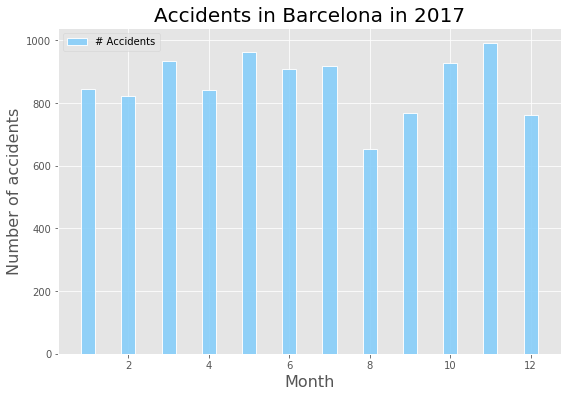

In [74]:
# plot accidents per month
# plt.plot(kind='bar',figsize=(12,7), color='blue', alpha=0.5)
#plt.bar(month, acc_num,figsize=(12,7), color='blue', alpha=0.5)
# title and x,y labels
plt.figure(figsize=(9,6))

plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Month',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16);

#plt.figure(figsize=(9,6))

plt.bar(month, acc_num, alpha=0.9, width = 0.35, facecolor = 'lightskyblue', edgecolor = 'white', label='# Accidents', lw=1)

plt.legend(loc="upper left") 


## Distribution of car accidents per day of the week

In [93]:
data.Weekday.unique()

array([4, 3, 2, 5, 1, 0, 6], dtype=int64)

In [94]:
week_acc = data.groupby(data['Weekday']).sum()

week_acc

,Month,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
Weekday,,,,,,,
0,9685,1725,27,1755,2890,3264.532573,62511.999743
1,10835,1946,34,1982,3241,3656.353675,70005.869650
2,10721,1871,31,1903,3206,3566.584808,68308.239621
3,10789,1946,33,1981,3221,3627.364224,69427.113799
4,11314,1984,44,2031,3390,3808.561054,72903.653967
5,7741,1414,33,1448,2220,2500.139141,47818.297050
6,5743,1047,39,1086,1693,1937.983036,37052.666108


In [99]:
week_list = Counter(data.Weekday.tolist())

week_list

Counter({4: 1761, 3: 1677, 2: 1650, 5: 1155, 1: 1691, 0: 1510, 6: 895})

In [100]:
week_num = []

for i in week_list.keys():
    week_num.append(i)
    
week_num

[4, 3, 2, 5, 1, 0, 6]

In [102]:
week_acc_num = []

for i in week_list.values():
    week_acc_num.append(i)

week_acc_num

[1761, 1677, 1650, 1155, 1691, 1510, 895]

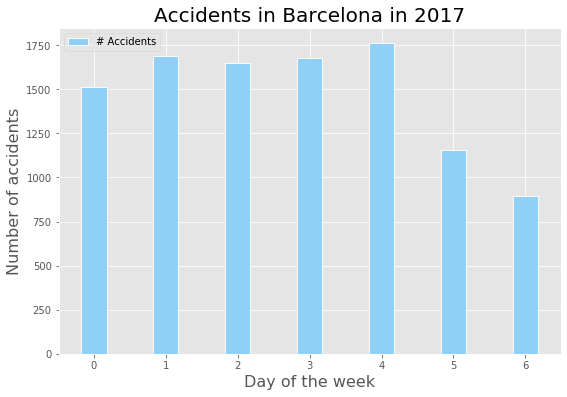

In [106]:
plt.figure(figsize=(9,6))

plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16);

#plt.figure(figsize=(9,6))

plt.bar(week_num, week_acc_num, alpha=0.9, width = 0.35, facecolor = 'lightskyblue', edgecolor = 'white', label='# Accidents', lw=1)

plt.legend(loc="upper left") 

In [109]:
data.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude,time
0,2017S008429,NaN,NaN,Número 27 ...,4,10,13,8:00:00,Morning,2,0,2,2,2.125624,41.340045,2017-10-13 08:00:00
1,2017S007316,NaN,NaN,Número 3 Zona Franca / Número 50 Zona Franca ...,4,9,1,13:00:00,Morning,2,0,2,2,2.120452,41.339426,2017-09-01 13:00:00
2,2017S010210,NaN,NaN,Litoral (Besòs) ...,4,12,8,21:00:00,Afternoon,5,0,5,2,2.167356,41.360885,2017-12-08 21:00:00
3,2017S006364,NaN,NaN,Número 3 Zona Franca ...,4,7,21,2:00:00,Night,1,0,1,2,2.124529,41.337668,2017-07-21 02:00:00
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,3,5,25,14:00:00,Afternoon,1,0,1,3,2.185272,41.416365,2017-05-25 14:00:00


In [150]:
data['Month_Day']= '2017-'+ data.Month.map(str)+ '-' + data.Day.map(str)

month_day = data['Month_Day'].tolist()

month_day

['2017-10-13 ',
 '2017-9-1 ',
 '2017-12-8 ',
 '2017-7-21 ',
 '2017-5-25 ',
 '2017-9-20 ',
 '2017-5-20 ',
 '2017-12-26 ',
 '2017-6-12 ',
 '2017-5-3 ',
 '2017-12-14 ',
 '2017-1-11 ',
 '2017-6-30 ',
 '2017-9-4 ',
 '2017-9-30 ',
 '2017-4-17 ',
 '2017-3-25 ',
 '2017-11-9 ',
 '2017-12-4 ',
 '2017-3-17 ',
 '2017-9-14 ',
 '2017-9-20 ',
 '2017-10-30 ',
 '2017-3-20 ',
 '2017-2-7 ',
 '2017-11-22 ',
 '2017-3-8 ',
 '2017-10-7 ',
 '2017-5-17 ',
 '2017-2-14 ',
 '2017-8-31 ',
 '2017-8-15 ',
 '2017-2-2 ',
 '2017-2-11 ',
 '2017-8-31 ',
 '2017-3-20 ',
 '2017-11-10 ',
 '2017-3-15 ',
 '2017-6-13 ',
 '2017-8-1 ',
 '2017-6-28 ',
 '2017-1-12 ',
 '2017-1-23 ',
 '2017-6-21 ',
 '2017-9-1 ',
 '2017-1-27 ',
 '2017-3-8 ',
 '2017-1-20 ',
 '2017-7-24 ',
 '2017-5-16 ',
 '2017-2-1 ',
 '2017-2-25 ',
 '2017-11-24 ',
 '2017-9-13 ',
 '2017-1-6 ',
 '2017-10-6 ',
 '2017-9-26 ',
 '2017-8-8 ',
 '2017-7-12 ',
 '2017-5-26 ',
 '2017-4-23 ',
 '2017-10-1 ',
 '2017-5-4 ',
 '2017-8-2 ',
 '2017-5-3 ',
 '2017-2-15 ',
 '2017-12-16 ',
 '

In [156]:
date_stats = Counter(month_day)

date_list = []

for i in date_stats.keys():
    date_list.append(i.strip())
    
date = pd.Series(date_list)
dates = pd.to_datetime(date)

# dates.sort_values(ascending=False)
# dates.sort_values()

dates

0     2017-10-13
1     2017-09-01
2     2017-12-08
3     2017-07-21
4     2017-05-25
         ...    
360   2017-12-31
361   2017-07-08
362   2017-09-03
363   2017-08-27
364   2017-08-19
Length: 365, dtype: datetime64[ns]

In [157]:
acc_num = []

for i in date_stats.values():
    acc_num.append(i)
    
acc_num

[25,
 26,
 8,
 36,
 33,
 36,
 26,
 24,
 42,
 36,
 27,
 32,
 42,
 27,
 22,
 13,
 20,
 43,
 30,
 41,
 24,
 36,
 33,
 31,
 43,
 35,
 20,
 33,
 40,
 36,
 13,
 31,
 22,
 44,
 30,
 38,
 21,
 26,
 32,
 30,
 30,
 33,
 42,
 33,
 28,
 40,
 19,
 44,
 29,
 11,
 32,
 32,
 22,
 37,
 45,
 16,
 18,
 31,
 36,
 36,
 36,
 34,
 38,
 36,
 29,
 34,
 42,
 15,
 33,
 13,
 31,
 29,
 24,
 38,
 41,
 38,
 49,
 13,
 34,
 37,
 15,
 45,
 19,
 38,
 23,
 25,
 14,
 15,
 49,
 33,
 22,
 12,
 27,
 21,
 28,
 32,
 36,
 50,
 16,
 31,
 11,
 20,
 22,
 39,
 25,
 23,
 35,
 39,
 42,
 34,
 41,
 29,
 32,
 24,
 25,
 29,
 26,
 20,
 33,
 35,
 52,
 41,
 38,
 42,
 45,
 41,
 27,
 35,
 27,
 44,
 30,
 46,
 13,
 18,
 30,
 21,
 40,
 38,
 34,
 45,
 25,
 40,
 42,
 33,
 35,
 12,
 25,
 33,
 13,
 17,
 46,
 16,
 14,
 28,
 13,
 24,
 17,
 26,
 18,
 29,
 25,
 29,
 34,
 26,
 28,
 23,
 37,
 38,
 28,
 21,
 20,
 29,
 42,
 38,
 44,
 31,
 16,
 15,
 19,
 49,
 23,
 34,
 34,
 28,
 13,
 35,
 16,
 10,
 32,
 26,
 30,
 30,
 14,
 36,
 20,
 38,
 35,
 38,
 37,
 19,
 

In [164]:
date_acc= dict(zip(dates, acc_num))
print(date_acc)

{Timestamp('2017-10-13 00:00:00'): 25, Timestamp('2017-09-01 00:00:00'): 26, Timestamp('2017-12-08 00:00:00'): 8, Timestamp('2017-07-21 00:00:00'): 36, Timestamp('2017-05-25 00:00:00'): 33, Timestamp('2017-09-20 00:00:00'): 36, Timestamp('2017-05-20 00:00:00'): 26, Timestamp('2017-12-26 00:00:00'): 24, Timestamp('2017-06-12 00:00:00'): 42, Timestamp('2017-05-03 00:00:00'): 36, Timestamp('2017-12-14 00:00:00'): 27, Timestamp('2017-01-11 00:00:00'): 32, Timestamp('2017-06-30 00:00:00'): 42, Timestamp('2017-09-04 00:00:00'): 27, Timestamp('2017-09-30 00:00:00'): 22, Timestamp('2017-04-17 00:00:00'): 13, Timestamp('2017-03-25 00:00:00'): 20, Timestamp('2017-11-09 00:00:00'): 43, Timestamp('2017-12-04 00:00:00'): 30, Timestamp('2017-03-17 00:00:00'): 41, Timestamp('2017-09-14 00:00:00'): 24, Timestamp('2017-10-30 00:00:00'): 36, Timestamp('2017-03-20 00:00:00'): 33, Timestamp('2017-02-07 00:00:00'): 31, Timestamp('2017-11-22 00:00:00'): 43, Timestamp('2017-03-08 00:00:00'): 35, Timestamp('2

In [173]:
date_plt = sorted(date_acc.items(), key = lambda item: item[0])

print(date_plt)

keys = []
values =[]

for item in date_plt:
    keys.append(item[0])
    values.append(item[1])
    
    
print(keys)
print(values)

[(Timestamp('2017-01-01 00:00:00'), 22), (Timestamp('2017-01-02 00:00:00'), 18), (Timestamp('2017-01-03 00:00:00'), 29), (Timestamp('2017-01-04 00:00:00'), 28), (Timestamp('2017-01-05 00:00:00'), 34), (Timestamp('2017-01-06 00:00:00'), 11), (Timestamp('2017-01-07 00:00:00'), 24), (Timestamp('2017-01-08 00:00:00'), 16), (Timestamp('2017-01-09 00:00:00'), 28), (Timestamp('2017-01-10 00:00:00'), 35), (Timestamp('2017-01-11 00:00:00'), 32), (Timestamp('2017-01-12 00:00:00'), 32), (Timestamp('2017-01-13 00:00:00'), 41), (Timestamp('2017-01-14 00:00:00'), 33), (Timestamp('2017-01-15 00:00:00'), 12), (Timestamp('2017-01-16 00:00:00'), 37), (Timestamp('2017-01-17 00:00:00'), 42), (Timestamp('2017-01-18 00:00:00'), 27), (Timestamp('2017-01-19 00:00:00'), 22), (Timestamp('2017-01-20 00:00:00'), 42), (Timestamp('2017-01-21 00:00:00'), 17), (Timestamp('2017-01-22 00:00:00'), 12), (Timestamp('2017-01-23 00:00:00'), 30), (Timestamp('2017-01-24 00:00:00'), 27), (Timestamp('2017-01-25 00:00:00'), 20),

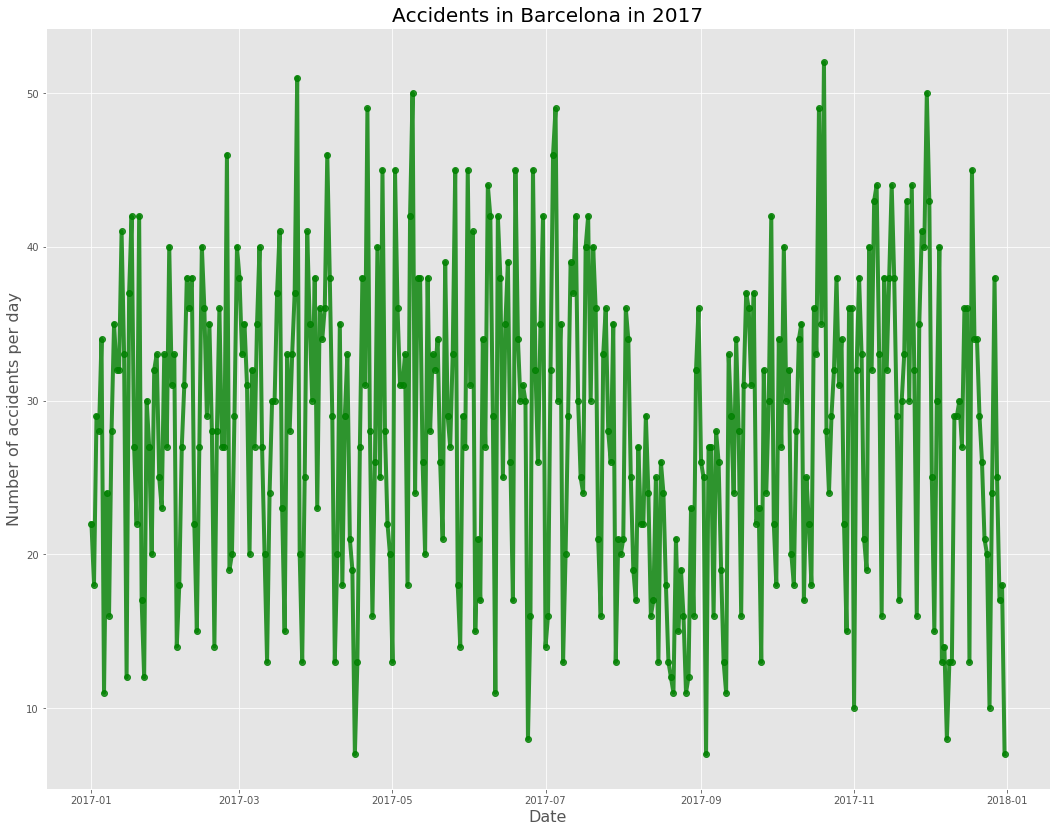

In [175]:
x=keys
y=values
plt.figure(figsize=(18,14))
plt.plot(x,y,'-o',lw=4,c='g',alpha=0.8)


plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Number of accidents per day',fontsize=16);


## Distribution of car accidents per hour

In [191]:
data.Hour

hour = []

data_hour = data.Hour.tolist()

for item in data_hour:
    item = int(item[:-6])
    #print(int(item))
    hour.append(item)
    
hour_dic = Counter(hour)
print(type(hour_dic))
hour_dic

<class 'collections.Counter'>


Counter({8: 610,
         13: 719,
         21: 489,
         2: 81,
         14: 738,
         12: 624,
         20: 583,
         15: 666,
         7: 308,
         16: 645,
         19: 648,
         22: 353,
         0: 185,
         11: 505,
         6: 164,
         18: 675,
         9: 642,
         23: 207,
         17: 638,
         10: 495,
         1: 134,
         4: 82,
         3: 56,
         5: 92})

In [194]:
#hour_plt = sorted(hour_dic.items(), key = lambda item: item[0])

keys=[]
values=[]

for key, value in hour_dic.items():
    keys.append(key)
    values.append(value)
    
keys
values


hour_plt=dict(zip(keys, values))

hour_plt = sorted(hour_plt.items(), key = lambda item: item[0])
hour_plt

[(0, 185),
 (1, 134),
 (2, 81),
 (3, 56),
 (4, 82),
 (5, 92),
 (6, 164),
 (7, 308),
 (8, 610),
 (9, 642),
 (10, 495),
 (11, 505),
 (12, 624),
 (13, 719),
 (14, 738),
 (15, 666),
 (16, 645),
 (17, 638),
 (18, 675),
 (19, 648),
 (20, 583),
 (21, 489),
 (22, 353),
 (23, 207)]

In [197]:
keys=[]
values=[]

for item in hour_plt:
    keys.append(item[0])
    values.append(item[1])
    


Text(0, 0.5, 'Number of accidents')

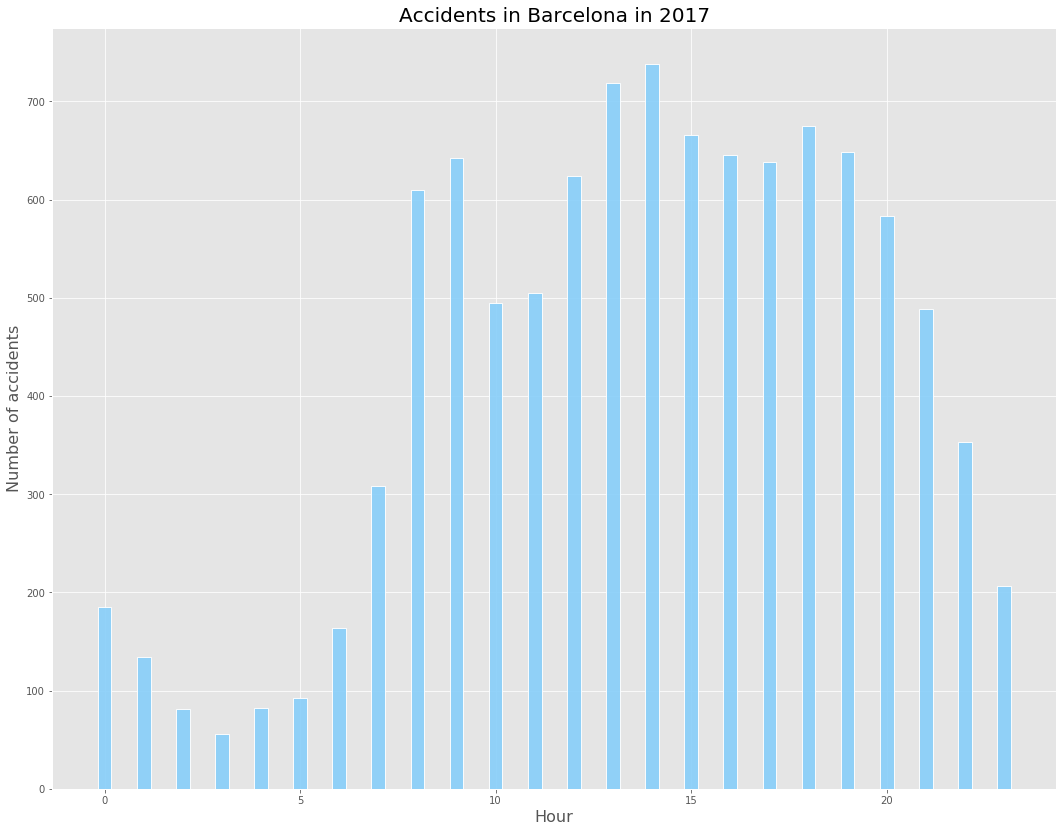

In [199]:
x= keys
y= values
plt.figure(figsize=(18,14))
#accidents_hour.plot(kind='bar',figsize=(12,7), color='orange', alpha=0.5)
plt.bar(x, y, alpha=0.9, width = 0.35, facecolor = 'lightskyblue', edgecolor = 'white', label='# Accidents', lw=1)

# title and x,y labels
plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Hour',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16)


## Type of accident analysis

In [201]:
data.columns

Index(['Id', 'District Name', 'Neighborhood Name', 'Street', 'Weekday',
       'Month', 'Day', 'Hour', 'Part of the day', 'Mild injuries',
       'Serious injuries', 'Victims', 'Vehicles involved', 'Longitude',
       'Latitude', 'time', 'Month_Day'],
      dtype='object')

### Vehicles involved

In [229]:
data['Vehicles involved']

data['Vehicles involved'].unique()

# lack of 12 

array([ 2,  3,  1,  4,  5,  6, 13,  8,  9,  7, 10,  0, 11, 14],
      dtype=int64)

In [232]:
# Compute the number of accidents according to the number of vehicles involved
vehicles_involved = data['Vehicles involved'].value_counts()
# return a pandas Series 

print(vehicles_involved)

#vehicles_involved.sort_index

2     7031
1     2260
3      798
4      165
5       48
6       14
7        6
9        5
0        5
10       2
8        2
14       1
13       1
11       1
Name: Vehicles involved, dtype: int64


In [227]:
vehicles_involved[12]=0 

print(type((vehicles_involved)))
print(vehicles_involved)

vehicles_involved.index

<class 'pandas.core.series.Series'>
2     7031
1     2260
3      798
4      165
5       48
6       14
7        6
9        5
0        5
10       2
8        2
14       1
13       1
11       1
12       0
Name: Vehicles involved, dtype: int64


Int64Index([2, 1, 3, 4, 5, 6, 7, 9, 0, 10, 8, 14, 13, 11, 12], dtype='int64')

In [234]:
vehicles_involved.sort_index(inplace = True)
print(type(vehicles_involved))
vehicles_involved

<class 'pandas.core.series.Series'>


0        5
1     2260
2     7031
3      798
4      165
5       48
6       14
7        6
8        2
9        5
10       2
11       1
13       1
14       1
Name: Vehicles involved, dtype: int64

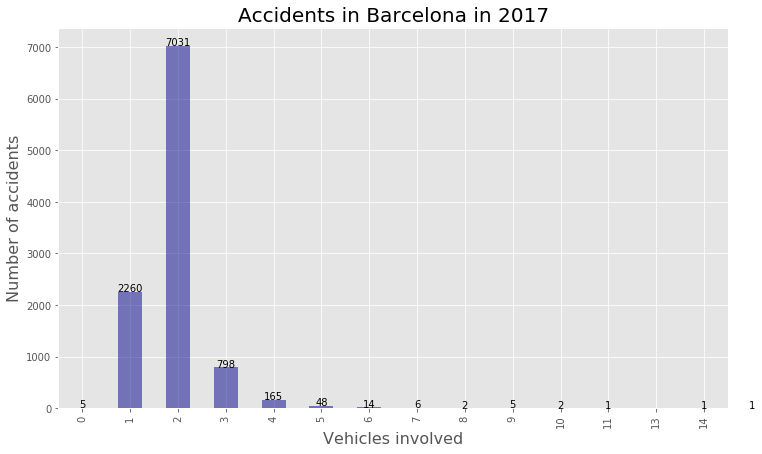

In [235]:
# Plot number of car accidents according to the number of vehicles involved
vehicles_involved.plot(kind='bar',figsize=(12,7), color='darkblue', alpha=0.5)

# Title and x,y labels
plt.title('Accidents in Barcelona in 2017',fontsize=20)
plt.xlabel('Vehicles involved',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16);

# Print a label above each bar indicating the number of accidents
for index in vehicles_involved.index:
    plt.text(x=index,y=vehicles_involved.loc[index],s=str(vehicles_involved.loc[index]),horizontalalignment='center')


## Mild — Serious injuries

In [241]:
data.columns

#data['Serious injuries'].unique()

data['Mild injuries'].unique()

array([ 2,  5,  1,  0,  4,  3,  8,  9,  6,  7, 10], dtype=int64)

In [244]:
injuries = data[['Serious injuries','Mild injuries']].sum()

injuries

Serious injuries      241
Mild injuries       11933
dtype: int64

Text(0, 0.5, '')

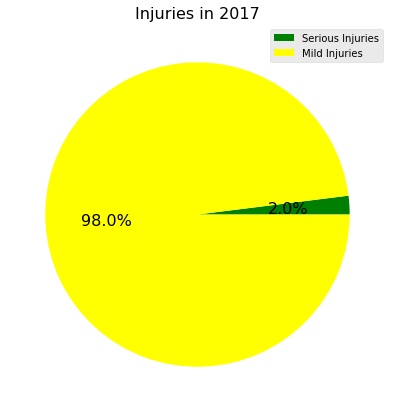

In [249]:
# Pie plot with the percentage of victims with mild and serious injuries
injuries.plot(kind='pie',figsize=(7,7), colors=['green','yellow'], labels=None, autopct='%1.1f%%', fontsize=16)

# Legend and title
plt.legend(labels=[ 'Serious Injuries', 'Mild Injuries',])
plt.title('Injuries in 2017', fontsize=16)
plt.ylabel('')

## Location analysis

In [250]:
import folium

# Define a map centered around Barcelona
barcelona_map = folium.Map(location=[41.38879, 2.15899], zoom_start=12)

# Display the map
barcelona_map

In [254]:
data.columns
# 'Longitude','Latitude','Serious injuries'

Index(['Id', 'District Name', 'Neighborhood Name', 'Street', 'Weekday',
       'Month', 'Day', 'Hour', 'Part of the day', 'Mild injuries',
       'Serious injuries', 'Victims', 'Vehicles involved', 'Longitude',
       'Latitude', 'time', 'Month_Day'],
      dtype='object')

In [257]:
# Create a map object of the city of Barcelona
barcelona_map= folium.Map(location=[41.38879, 2.15899], zoom_start=12)

# Display only accidents where serious injuries where recorded
for lat, lng, label in zip(data['Latitude'], data['Longitude'], data['Serious injuries'].astype(str)):
    if label!='0':
        folium.CircleMarker(
            [lat, lng],
            radius=3,
            color='red',
            fill=True,
            popup=label,
            fill_color='darkred',
            fill_opacity=0.6
        ).add_to(barcelona_map)
    
# Show map
barcelona_map

In [259]:
from folium import plugins

# Create a map object of the city of Barcelona
barcelona_map= folium.Map(location=[41.38879, 2.15899], zoom_start=12)

# Instantiate a mark cluster object for the car accidents
accidents = plugins.MarkerCluster().add_to(barcelona_map)

# Display only accidents where serious injuries where recorded
for lat, lng, label in zip(data['Latitude'], data['Longitude'], data['Serious injuries'].astype(str)):
    if label!='0':
        folium.Marker(
            location=[lat, lng],
            icon=None,
            popup=label,
        ).add_to(accidents)

# Display map
barcelona_map

In [263]:
data.Hour

hour = []

data_hour = data.Hour.tolist()

for item in data_hour:
    item = int(item[:-6])
    #print(int(item))
    hour.append(item)
    
hour
data['trans_hour']=hour


In [264]:
from folium.plugins import HeatMapWithTime

# Create a map object of the city of Barcelona
barcelona_map= folium.Map(location=[41.38879, 2.15899], zoom_start=12)

# Nested list that contains the latitud and the longitud of the different accidents. 
hour_list = [[] for _ in range(24)]
for lat,log,hour in zip(data['Latitude'], data['Longitude'],data['trans_hour']):
    hour_list[hour].append([lat,log]) 

# Labels indicating the hours
index = [str(i)+' Hours' for i in range(24)]

# Instantiate a heat map wiht time object for the car accidents
HeatMapWithTime(hour_list, index).add_to(barcelona_map)

barcelona_map